In [1]:
%matplotlib inline


# PyTplot Demo

Written by Julie Barnum and Elysia Lucas. 
The purpose of this demo is to show off some of the capabilities of PyTplot.


In [2]:
import urllib

import pytplot

## Loading data into memory
The pytplot package comes with a sample IDL tplot save file which will be used for the following tutorial,
located in PyTplot Github (https://github.com/MAVENSDC/PyTplot) under pytplot/pytplot/sampledata.
This file was generated in IDL, and therefore can be loaded into tplot if you wish to compare the
IDL and python versions.
Download the test file from the PyTplot Github acct



In [3]:
url = 'https://github.com/MAVENSDC/PyTplot/raw/master/docs/test_data.tplot'

urllib.request.urlretrieve(url, "./test_data.tplot")

('./test_data.tplot', <http.client.HTTPMessage at 0x18e0d76a0>)

To load this data into pytplot, type in the following command:



In [4]:
pytplot.tplot_restore(r'test_data.tplot')
print(pytplot.tplot_names())

0 : SEP_2_ELEC
1 : SEP_1_ION
2 : SEP_2_ION
3 : swia_counts
4 : swia_den
5 : swia_vel
6 : mag
7 : orbit
['SEP_2_ELEC', 'SEP_1_ION', 'SEP_2_ION', 'swia_counts', 'swia_den', 'swia_vel', 'mag', 'orbit']


## Storing data
pytplot works by interacting with global variables (called tplot variables) that contain information necessary for
creating one panel (or even one portion of a panel) of a plot, that can be accessed from the main level or
within any Python routine. Before anything can be plotted, tplot variables must be loaded into memory.
Single line Plot: to store data to plot a single line, the 'y' data will be a single list of data
that will correspond to the points that will make up the line.
Multi-line Plot: to store data to plot a multi-line plot, the 'y' data will be a list of lists.
Each column of the "matrix" created is the data for one line. So if you had a list with four lists in it
and three elements in each list [[1,2,3],[4,5,6],[7,8,9],[10,11,12]] three lines with four data points each
will be plotted.
Spectrogram Plot: to store data to plot for a spectrogram, 'v' data will be a list of bins for the data,
and the 'y' data will be a matrix of values with dimensions of the length of "x" time the length of "v"
Map Plot: to store data to plot for a latitude/longitude plot, 'x' will contain a list of latitudes
and a list of longitudes, for example 'x':[[15,30,45],[30,60,90]], and the 'y' data will be a list of values
that correspond to those latitude/longitude points
Combining Two Plots: store_data('new_name', ['old_name1', 'old_name2'])
to combine multiple existing tplot variables ('old_name1' and 'old_name2') into one new tplot variable
('new_name'). 'new_name' will have all data from the existing tplot variables entered in one new tplot variable.



## Pytplot variables
pytplot.tplot_names() will print the numbers and names of the tplot variables currently in memory.
When using any routines that require the name of the tplot variable, the user can use either
the name of the variable or the corresponding number.



In [5]:
pytplot.tplot_names()

0 : SEP_2_ELEC
1 : SEP_1_ION
2 : SEP_2_ION
3 : swia_counts
4 : swia_den
5 : swia_vel
6 : mag
7 : orbit


['SEP_2_ELEC',
 'SEP_1_ION',
 'SEP_2_ION',
 'swia_counts',
 'swia_den',
 'swia_vel',
 'mag',
 'orbit']

## Options
pytplot.options('tplot_var', 'option', 'option_value') can be used to change plotting options
corresponding to specific tplot variables. All options currently implemented are described in
the pytplot documentation, but here are some examples to get you started.



In [6]:
# Line Thickness
pytplot.options('swia_vel', 'thick', 4)
# Y-axis Label
pytplot.options('swia_vel', 'ytitle', 'speed (km/s)')
# Vertical Plot Bounds
pytplot.options('SEP_1_ION', 'yrange', [5, 5000])
# Panel Size
pytplot.options(['mag', 'swia_den', 'swia_vel'], 'panel_size', 0.5)

## Tplot Options
pytplot.tplot_options('option', 'option_value') can be used to change plotting options for the tplot routine.
These control options affect all panels in a plot.



In [7]:
# Title
pytplot.tplot_options('title', 'All Plots')
# Window Size
pytplot.tplot_options('wsize', [800, 800])

# Adding a region of interest (ROI)
# pytplot will add a ROI (indicated by two vertical red lines, with grey shading in between)
# to all plot via specifying the 'roi' option
pytplot.tplot_options('roi', ['2016-06-20 11:12:24', '2016-06-20 14:12:00'])

# Another option available in tplot_options is to specify the number of seconds with consecutive nan
# values allowed before no interpolation should occur
pytplot.tplot_options('data_gap', 80)

## Displaying data using tplot
Single Panel Plot



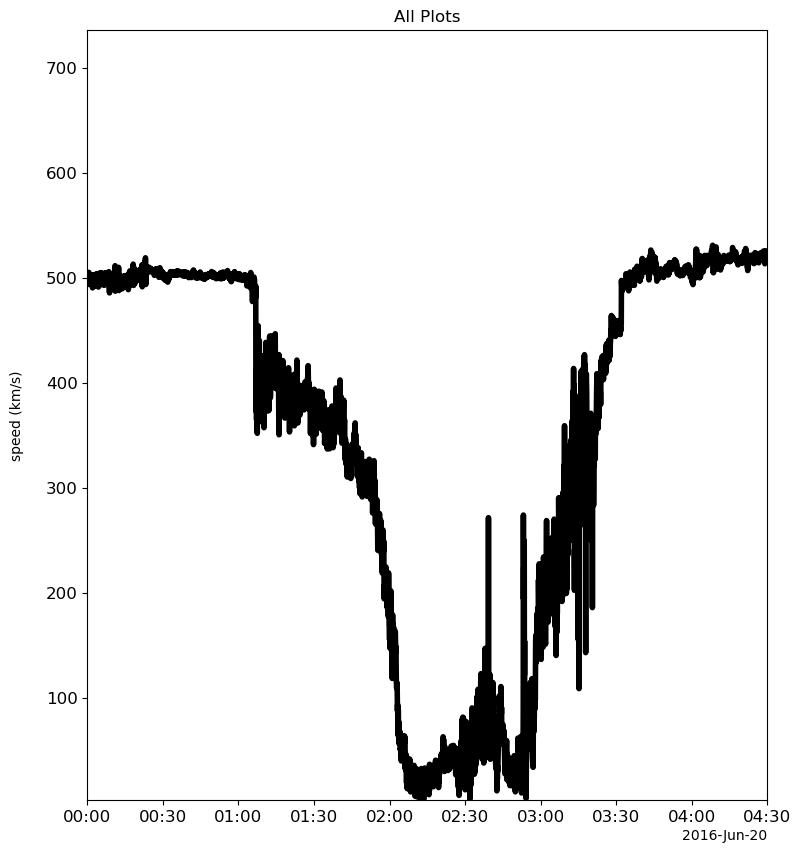

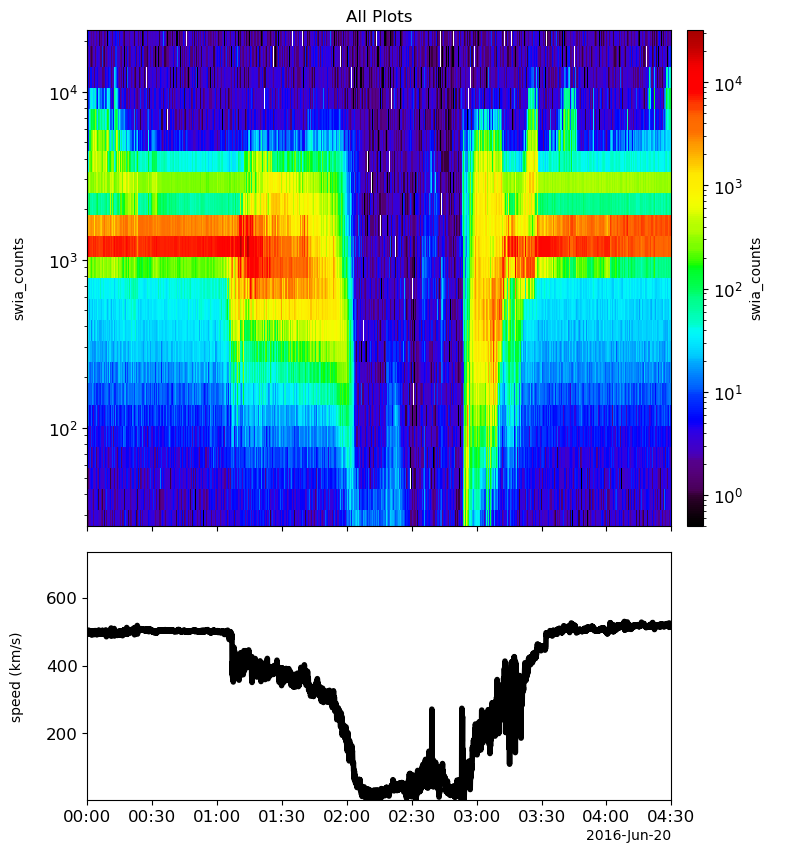

In [8]:
pytplot.tplot('swia_vel')  # or, pytplot.tplot(6)

# Multiple Panel Plot
pytplot.tplot(['swia_counts', 'swia_vel'])  # or, pytplot.tplot([4,6])

## Interacting with Data Plots
There are several ways to interact with the data plots. There is command line interaction
that follows the same pattern of functions IDL utilizes. Pytplot additionally has interactivity
built into the viewing window in the form of "tools".



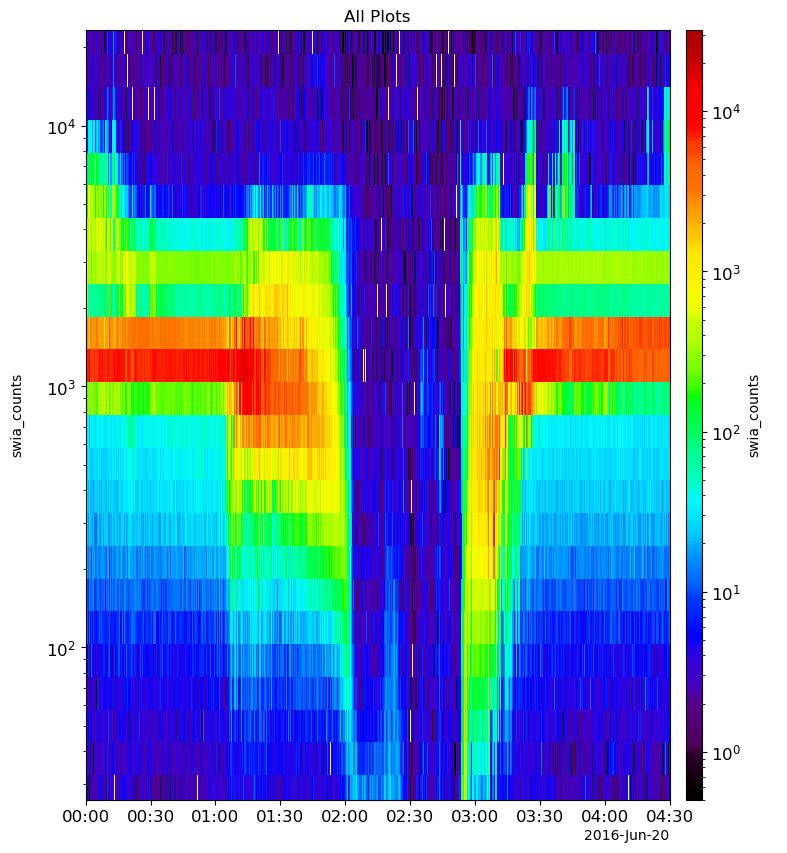

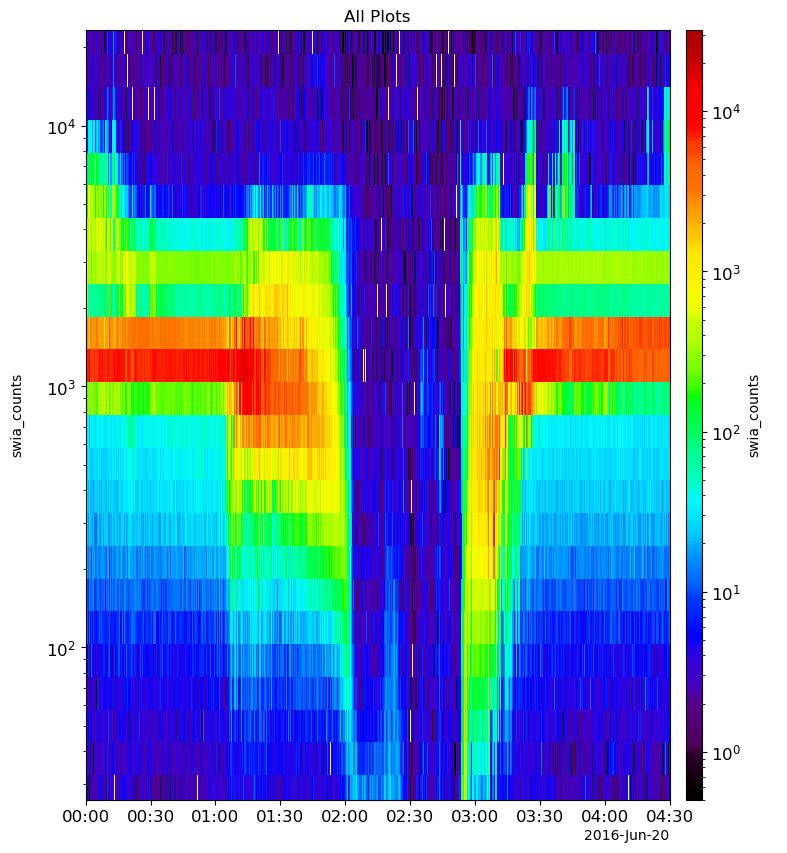

In [9]:
# Moving forward and backward in time
# The Pan tool allows the user to click and drag the mouse on the plot to move along the x- or y-axis.

# Zooming in and out
# The Box Zoom tool allows the user to click and drag the mouse on the plot to specify
# their desired x-axis range.

# Show data points
# The Hover Tool displays the data of a given point when the user hovers their mouse over the line.

# Add crosshairs to plot window
# The Crosshairs Tool displays a set of crosshairs that follow the location of the mouse on the plot.
# Crosshairs can be modified to be not displayed...
pytplot.tplot_options('crosshair', False)
pytplot.tplot('swia_counts')

# and crosshair names can be modified.
pytplot.tplot_options('crosshair', True)  # Just re-adding the crosshairs
pytplot.options('swia_counts', 'crosshair_x', 'XXX')
pytplot.options('swia_counts', 'crosshair_y', 'YYY')
pytplot.options('swia_counts', 'crosshair_z', 'ZZZ')
pytplot.tplot('swia_counts')

# Adding timebars
# To place a vertical line at a specific time on all panels:
# pytplot.timebar('2016-06-20 01:15:32', thick=3, color='green') will add a vertical black line to all plots
# at the time entered. Further settings related to this routine are described in the pytplot documentation.
pytplot.timebar('2016-06-20 01:15:32', thick=3, color='green')

## Interacting with spectrogram plots
pytplot also has the ability to interact directly with spectrograms.
If you supply the interactive=True keyword to a pytplot.tplot command,
a plot will appear next to the spectrogram that reads out "slices" of the plot when you hover the mouse over it.
Additionally, you can set options in pytplot to include 'static_tavg', 'static', and 't_average',
which creates a separate plot with the average over a specified time period,
creates a separate plot with a single specified time period,
and specifies a time period (in seconds, based on the mouse's current location)
over which time should be averaged for the window which pops up when 'interactive=true' is specified, respectively.
You can also log axes in both the spectrogram plots ('xlog' and 'zlog' options),
and the interactive plots ('xlog_interactive' and 'ylog_interactive' options).



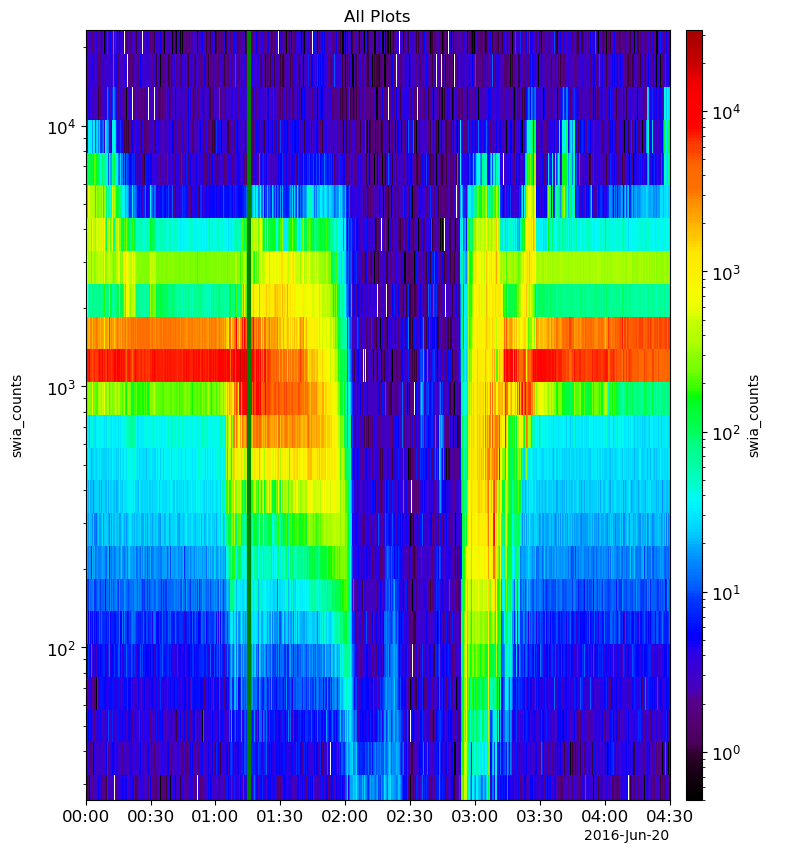

In [10]:
pytplot.options('swia_counts', 'ylog', 1)  # setting to 0 would make the y-axis linear
pytplot.options('swia_counts', 'zlog', 1)  # setting ot 0 would make the z-axis linear
pytplot.options('swia_counts', 'xlog_interactive', True)  # Setting to False would make the x-axis linear
pytplot.options('swia_counts', 'ylog_interactive', True)  # Setting to False would make the y-axis linear
pytplot.options('swia_counts', 'static_tavg', ['2016-06-20 12:00:00', '2016-06-20 13:00:00'])
pytplot.options('swia_counts', 'static', '2016-06-20 01:00:57')
pytplot.options('swia_counts', 't_average', 1200)
pytplot.tplot('swia_counts')

## Saving output
pytplot plots have the ability to be saved via 'Save PNG' option from the plot window, or you can specify
that you want to save a plot ahead of time via the 'save_png' option
(e.g., pytplot.tplot('swia_counts', save_png = '/path/to/png/PNG.png')



## Displaying in bokeh
pytplot allows you to use bokeh for visualizing data (bokeh is a Python library that allows interactive plots
to be visualized via a web browser window), via the 'bokeh' option
(e.g., pytplot.tplot('swia_counts', bokeh=True)

